In [1]:
import datetime
print("Model Start Time :" + datetime.datetime.today().ctime())

Training an image classifier
----------------------------

Import all necessary packages from all.py file

In [2]:
from all import *

C:\ProgramData\Anaconda3\lib\site-packages\tqdm\autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)
  pip install torch-lr-finder -v --global-option="amp"


### Network Summary

In [3]:
device = has_cuda()
print(device)
net = ResNet18().to(device)
summary(net, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
          Dropout-13           [-1, 64, 32, 32]               0
           Conv2d-14          [-1,

### Load train and test data for CIFAR10 with albumentation


In [4]:
dataloader = dataloader_cifar10
trainloader = dataloader(split='train')
testloader = dataloader( split='test')
# optimizer= get_optimizer(net)
criterion = nn.CrossEntropyLoss()


Files already downloaded and verified
Files already downloaded and verified


In [5]:

optimizer = optim.SGD(net.parameters(), lr=0.001, weight_decay=1e-2)
lr_finder = LRFinder(net, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=100, num_iter=100, step_mode="exp")


Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


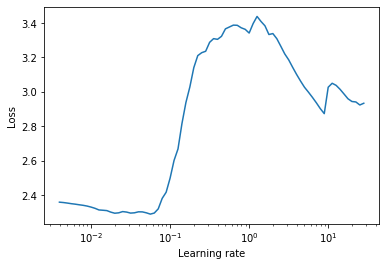

In [6]:
lr_finder.plot()
lr_finder.reset()

###  Validation loss (Leslie N. Smith)

In [7]:
lr_finder.range_test(trainloader, val_loader=testloader, end_lr=100, num_iter=100, step_mode="exp")

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


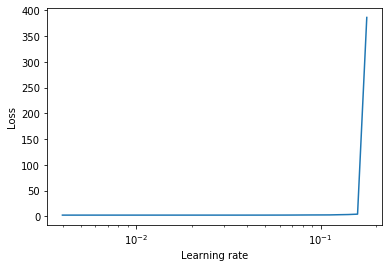

In [8]:
lr_finder.plot(skip_end=0)

In [9]:
lr_finder.reset()

In [10]:
optimizer = optim.SGD(net.parameters(), lr=0.07,momentum=0.9, weight_decay=0, nesterov=True)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max',factor=0.9, patience=2, verbose=True)

In [11]:
losses = []
accuracy = []
correct_samples = []
incorrect_samples = []
sample_count=25
lr_data = []
EPOCH =50
last_epoch = False
for epoch in range(1, EPOCH + 1):
    print(f'Epoch {epoch}:')
    if epoch == EPOCH:
        last_epoch = True
    train(net, device, optimizer,criterion, epoch,trainloader)
    val_loss=test(net,testloader, device,criterion, losses,accuracy,correct_samples, incorrect_samples, sample_count, last_epoch=last_epoch)
    scheduler.step(val_loss)
    for param_groups in optimizer.param_groups:
        print("Learning rate =", param_groups['lr'], " for epoch: ", epoch + 1)  # print LR for different epochs
        lr_data.append(param_groups['lr'])

Epoch 1:


Epoch=1 Loss=1.3840914964675903 Batch_id=781 Training Accuracy=34.61: 100%|██████████| 782/782 [05:50<00:00,  2.23it/s]



Test set: Average loss: 0.0227, Accuracy: 4646/10000 (46%)

Learning rate = 0.07  for epoch:  2
Epoch 2:


Epoch=2 Loss=0.9778805375099182 Batch_id=781 Training Accuracy=50.70: 100%|██████████| 782/782 [05:43<00:00,  2.27it/s]



Test set: Average loss: 0.0213, Accuracy: 5424/10000 (54%)

Learning rate = 0.07  for epoch:  3
Epoch 3:


Epoch=3 Loss=1.1532371044158936 Batch_id=781 Training Accuracy=60.08: 100%|██████████| 782/782 [05:56<00:00,  2.19it/s]



Test set: Average loss: 0.0149, Accuracy: 6628/10000 (66%)

Learning rate = 0.07  for epoch:  4
Epoch 4:


Epoch=4 Loss=0.5620974898338318 Batch_id=781 Training Accuracy=66.56: 100%|██████████| 782/782 [06:21<00:00,  2.05it/s]



Test set: Average loss: 0.0131, Accuracy: 7097/10000 (71%)

Learning rate = 0.07  for epoch:  5
Epoch 5:


Epoch=5 Loss=0.7293100953102112 Batch_id=781 Training Accuracy=71.14: 100%|██████████| 782/782 [05:50<00:00,  2.23it/s]



Test set: Average loss: 0.0112, Accuracy: 7507/10000 (75%)

Learning rate = 0.07  for epoch:  6
Epoch 6:


Epoch=6 Loss=0.6524549722671509 Batch_id=781 Training Accuracy=74.97: 100%|██████████| 782/782 [05:50<00:00,  2.23it/s]



Test set: Average loss: 0.0108, Accuracy: 7617/10000 (76%)

Learning rate = 0.07  for epoch:  7
Epoch 7:


Epoch=7 Loss=0.7044820785522461 Batch_id=781 Training Accuracy=77.94: 100%|██████████| 782/782 [05:20<00:00,  2.44it/s]



Test set: Average loss: 0.0090, Accuracy: 8050/10000 (80%)

Learning rate = 0.07  for epoch:  8
Epoch 8:


Epoch=8 Loss=1.3106575012207031 Batch_id=781 Training Accuracy=80.10: 100%|██████████| 782/782 [04:58<00:00,  2.62it/s]



Test set: Average loss: 0.0089, Accuracy: 8104/10000 (81%)

Learning rate = 0.07  for epoch:  9
Epoch 9:


Epoch=9 Loss=0.3668544292449951 Batch_id=781 Training Accuracy=81.91: 100%|██████████| 782/782 [04:30<00:00,  2.89it/s]



Test set: Average loss: 0.0086, Accuracy: 8144/10000 (81%)

Learning rate = 0.07  for epoch:  10
Epoch 10:


Epoch=10 Loss=0.7118936777114868 Batch_id=781 Training Accuracy=83.25: 100%|█████████| 782/782 [03:37<00:00,  3.59it/s]



Test set: Average loss: 0.0073, Accuracy: 8398/10000 (84%)

Learning rate = 0.07  for epoch:  11
Epoch 11:


Epoch=11 Loss=0.3809705078601837 Batch_id=781 Training Accuracy=84.64: 100%|█████████| 782/782 [03:33<00:00,  3.66it/s]



Test set: Average loss: 0.0073, Accuracy: 8447/10000 (84%)

Learning rate = 0.07  for epoch:  12
Epoch 12:


Epoch=12 Loss=0.22445841133594513 Batch_id=781 Training Accuracy=85.86: 100%|████████| 782/782 [03:39<00:00,  3.56it/s]



Test set: Average loss: 0.0068, Accuracy: 8565/10000 (86%)

Learning rate = 0.07  for epoch:  13
Epoch 13:


Epoch=13 Loss=0.284932941198349 Batch_id=781 Training Accuracy=86.85: 100%|██████████| 782/782 [03:39<00:00,  3.56it/s]



Test set: Average loss: 0.0062, Accuracy: 8668/10000 (87%)

Learning rate = 0.07  for epoch:  14
Epoch 14:


Epoch=14 Loss=0.31458163261413574 Batch_id=781 Training Accuracy=87.78: 100%|████████| 782/782 [03:39<00:00,  3.56it/s]



Test set: Average loss: 0.0063, Accuracy: 8663/10000 (87%)

Learning rate = 0.07  for epoch:  15
Epoch 15:


Epoch=15 Loss=0.4125310480594635 Batch_id=781 Training Accuracy=88.46: 100%|█████████| 782/782 [03:37<00:00,  3.59it/s]



Test set: Average loss: 0.0064, Accuracy: 8655/10000 (87%)

Learning rate = 0.07  for epoch:  16
Epoch 16:


Epoch=16 Loss=0.9618754386901855 Batch_id=781 Training Accuracy=89.22: 100%|█████████| 782/782 [03:40<00:00,  3.54it/s]



Test set: Average loss: 0.0067, Accuracy: 8623/10000 (86%)

Epoch    15: reducing learning rate of group 0 to 6.3000e-02.
Learning rate = 0.06300000000000001  for epoch:  17
Epoch 17:


Epoch=17 Loss=0.3603712320327759 Batch_id=781 Training Accuracy=90.45: 100%|█████████| 782/782 [03:37<00:00,  3.60it/s]



Test set: Average loss: 0.0056, Accuracy: 8842/10000 (88%)

Learning rate = 0.06300000000000001  for epoch:  18
Epoch 18:


Epoch=18 Loss=0.7639902830123901 Batch_id=781 Training Accuracy=91.20: 100%|█████████| 782/782 [03:38<00:00,  3.58it/s]



Test set: Average loss: 0.0060, Accuracy: 8790/10000 (88%)

Learning rate = 0.06300000000000001  for epoch:  19
Epoch 19:


Epoch=19 Loss=0.5902104377746582 Batch_id=781 Training Accuracy=91.53: 100%|█████████| 782/782 [03:37<00:00,  3.60it/s]



Test set: Average loss: 0.0061, Accuracy: 8814/10000 (88%)

Learning rate = 0.06300000000000001  for epoch:  20
Epoch 20:


Epoch=20 Loss=0.13913866877555847 Batch_id=781 Training Accuracy=92.03: 100%|████████| 782/782 [03:37<00:00,  3.59it/s]



Test set: Average loss: 0.0061, Accuracy: 8763/10000 (88%)

Epoch    19: reducing learning rate of group 0 to 5.6700e-02.
Learning rate = 0.056700000000000014  for epoch:  21
Epoch 21:


Epoch=21 Loss=0.7389945983886719 Batch_id=781 Training Accuracy=92.98: 100%|█████████| 782/782 [03:38<00:00,  3.58it/s]



Test set: Average loss: 0.0056, Accuracy: 8892/10000 (89%)

Learning rate = 0.056700000000000014  for epoch:  22
Epoch 22:


Epoch=22 Loss=0.13389769196510315 Batch_id=781 Training Accuracy=93.31: 100%|████████| 782/782 [03:38<00:00,  3.57it/s]



Test set: Average loss: 0.0057, Accuracy: 8906/10000 (89%)

Learning rate = 0.056700000000000014  for epoch:  23
Epoch 23:


Epoch=23 Loss=0.012626409530639648 Batch_id=781 Training Accuracy=93.41: 100%|███████| 782/782 [03:38<00:00,  3.57it/s]



Test set: Average loss: 0.0054, Accuracy: 8928/10000 (89%)

Learning rate = 0.056700000000000014  for epoch:  24
Epoch 24:


Epoch=24 Loss=0.0985150933265686 Batch_id=781 Training Accuracy=93.96: 100%|█████████| 782/782 [03:32<00:00,  3.68it/s]



Test set: Average loss: 0.0059, Accuracy: 8884/10000 (89%)

Learning rate = 0.056700000000000014  for epoch:  25
Epoch 25:


Epoch=25 Loss=0.0808086097240448 Batch_id=781 Training Accuracy=94.26: 100%|█████████| 782/782 [03:35<00:00,  3.63it/s]



Test set: Average loss: 0.0057, Accuracy: 8956/10000 (90%)

Learning rate = 0.056700000000000014  for epoch:  26
Epoch 26:


Epoch=26 Loss=0.31426161527633667 Batch_id=781 Training Accuracy=94.53: 100%|████████| 782/782 [03:39<00:00,  3.56it/s]



Test set: Average loss: 0.0057, Accuracy: 8906/10000 (89%)

Learning rate = 0.056700000000000014  for epoch:  27
Epoch 27:


Epoch=27 Loss=0.04012411832809448 Batch_id=781 Training Accuracy=94.77: 100%|████████| 782/782 [03:39<00:00,  3.57it/s]



Test set: Average loss: 0.0055, Accuracy: 8983/10000 (90%)

Learning rate = 0.056700000000000014  for epoch:  28
Epoch 28:


Epoch=28 Loss=0.05740520358085632 Batch_id=781 Training Accuracy=94.92: 100%|████████| 782/782 [03:40<00:00,  3.54it/s]



Test set: Average loss: 0.0057, Accuracy: 8931/10000 (89%)

Learning rate = 0.056700000000000014  for epoch:  29
Epoch 29:


Epoch=29 Loss=0.3943447768688202 Batch_id=781 Training Accuracy=95.22: 100%|█████████| 782/782 [03:40<00:00,  3.54it/s]



Test set: Average loss: 0.0054, Accuracy: 9019/10000 (90%)

Learning rate = 0.056700000000000014  for epoch:  30
Epoch 30:


Epoch=30 Loss=0.031244337558746338 Batch_id=781 Training Accuracy=95.33: 100%|███████| 782/782 [03:38<00:00,  3.58it/s]



Test set: Average loss: 0.0056, Accuracy: 9020/10000 (90%)

Learning rate = 0.056700000000000014  for epoch:  31
Epoch 31:


Epoch=31 Loss=0.016581445932388306 Batch_id=781 Training Accuracy=95.57: 100%|███████| 782/782 [03:37<00:00,  3.59it/s]



Test set: Average loss: 0.0057, Accuracy: 8977/10000 (90%)

Learning rate = 0.056700000000000014  for epoch:  32
Epoch 32:


Epoch=32 Loss=0.2322966754436493 Batch_id=781 Training Accuracy=95.70: 100%|█████████| 782/782 [03:16<00:00,  3.99it/s]



Test set: Average loss: 0.0055, Accuracy: 8976/10000 (90%)

Learning rate = 0.056700000000000014  for epoch:  33
Epoch 33:


Epoch=33 Loss=0.04552185535430908 Batch_id=781 Training Accuracy=95.82: 100%|████████| 782/782 [03:12<00:00,  4.06it/s]



Test set: Average loss: 0.0054, Accuracy: 9010/10000 (90%)

Epoch    32: reducing learning rate of group 0 to 5.1030e-02.
Learning rate = 0.05103000000000001  for epoch:  34
Epoch 34:


Epoch=34 Loss=0.025946974754333496 Batch_id=781 Training Accuracy=96.11: 100%|███████| 782/782 [03:13<00:00,  4.04it/s]



Test set: Average loss: 0.0053, Accuracy: 9039/10000 (90%)

Learning rate = 0.05103000000000001  for epoch:  35
Epoch 35:


Epoch=35 Loss=0.29773953557014465 Batch_id=781 Training Accuracy=96.31: 100%|████████| 782/782 [03:27<00:00,  3.76it/s]



Test set: Average loss: 0.0054, Accuracy: 9055/10000 (91%)

Learning rate = 0.05103000000000001  for epoch:  36
Epoch 36:


Epoch=36 Loss=0.05728262662887573 Batch_id=781 Training Accuracy=96.53: 100%|████████| 782/782 [07:21<00:00,  1.77it/s]



Test set: Average loss: 0.0056, Accuracy: 9034/10000 (90%)

Learning rate = 0.05103000000000001  for epoch:  37
Epoch 37:


Epoch=37 Loss=0.05762222409248352 Batch_id=781 Training Accuracy=96.43: 100%|████████| 782/782 [07:50<00:00,  1.66it/s]



Test set: Average loss: 0.0053, Accuracy: 9053/10000 (91%)

Learning rate = 0.05103000000000001  for epoch:  38
Epoch 38:


Epoch=38 Loss=0.07607206702232361 Batch_id=781 Training Accuracy=96.78: 100%|████████| 782/782 [03:19<00:00,  3.92it/s]



Test set: Average loss: 0.0054, Accuracy: 9069/10000 (91%)

Learning rate = 0.05103000000000001  for epoch:  39
Epoch 39:


Epoch=39 Loss=0.05934983491897583 Batch_id=781 Training Accuracy=96.85: 100%|████████| 782/782 [03:01<00:00,  4.32it/s]



Test set: Average loss: 0.0055, Accuracy: 9058/10000 (91%)

Learning rate = 0.05103000000000001  for epoch:  40
Epoch 40:


Epoch=40 Loss=0.03210717439651489 Batch_id=781 Training Accuracy=96.90: 100%|████████| 782/782 [03:06<00:00,  4.20it/s]



Test set: Average loss: 0.0054, Accuracy: 9048/10000 (90%)

Learning rate = 0.05103000000000001  for epoch:  41
Epoch 41:


Epoch=41 Loss=0.17252138257026672 Batch_id=781 Training Accuracy=97.05: 100%|████████| 782/782 [03:01<00:00,  4.32it/s]



Test set: Average loss: 0.0055, Accuracy: 9080/10000 (91%)

Learning rate = 0.05103000000000001  for epoch:  42
Epoch 42:


Epoch=42 Loss=0.040920108556747437 Batch_id=781 Training Accuracy=97.07: 100%|███████| 782/782 [03:04<00:00,  4.23it/s]



Test set: Average loss: 0.0053, Accuracy: 9065/10000 (91%)

Learning rate = 0.05103000000000001  for epoch:  43
Epoch 43:


Epoch=43 Loss=0.02619221806526184 Batch_id=781 Training Accuracy=97.22: 100%|████████| 782/782 [03:07<00:00,  4.17it/s]



Test set: Average loss: 0.0058, Accuracy: 9079/10000 (91%)

Learning rate = 0.05103000000000001  for epoch:  44
Epoch 44:


Epoch=44 Loss=0.3431492745876312 Batch_id=781 Training Accuracy=97.21: 100%|█████████| 782/782 [03:00<00:00,  4.32it/s]



Test set: Average loss: 0.0059, Accuracy: 9006/10000 (90%)

Epoch    43: reducing learning rate of group 0 to 4.5927e-02.
Learning rate = 0.04592700000000001  for epoch:  45
Epoch 45:


Epoch=45 Loss=0.02564355731010437 Batch_id=781 Training Accuracy=97.35: 100%|████████| 782/782 [03:10<00:00,  4.11it/s]



Test set: Average loss: 0.0053, Accuracy: 9091/10000 (91%)

Learning rate = 0.04592700000000001  for epoch:  46
Epoch 46:


Epoch=46 Loss=0.15113160014152527 Batch_id=781 Training Accuracy=97.55: 100%|████████| 782/782 [03:05<00:00,  4.21it/s]



Test set: Average loss: 0.0051, Accuracy: 9127/10000 (91%)

Learning rate = 0.04592700000000001  for epoch:  47
Epoch 47:


Epoch=47 Loss=0.03848204016685486 Batch_id=781 Training Accuracy=97.57: 100%|████████| 782/782 [03:08<00:00,  4.14it/s]



Test set: Average loss: 0.0059, Accuracy: 9061/10000 (91%)

Learning rate = 0.04592700000000001  for epoch:  48
Epoch 48:


Epoch=48 Loss=0.004478275775909424 Batch_id=781 Training Accuracy=97.60: 100%|███████| 782/782 [03:10<00:00,  4.10it/s]



Test set: Average loss: 0.0053, Accuracy: 9133/10000 (91%)

Learning rate = 0.04592700000000001  for epoch:  49
Epoch 49:


Epoch=49 Loss=0.11235366761684418 Batch_id=781 Training Accuracy=97.71: 100%|████████| 782/782 [03:00<00:00,  4.33it/s]



Test set: Average loss: 0.0055, Accuracy: 9126/10000 (91%)

Learning rate = 0.04592700000000001  for epoch:  50
Epoch 50:


Epoch=50 Loss=0.14579269289970398 Batch_id=781 Training Accuracy=97.88: 100%|████████| 782/782 [03:11<00:00,  4.08it/s]



Test set: Average loss: 0.0055, Accuracy: 9096/10000 (91%)

Learning rate = 0.04592700000000001  for epoch:  51


### Achieve 88 and above accuracy

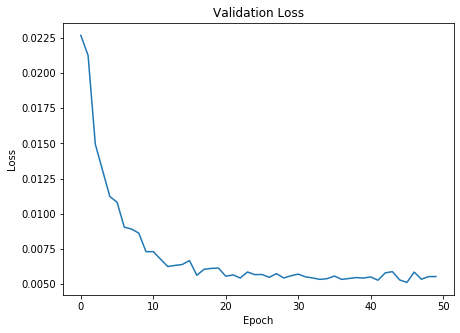

In [12]:
plot_metric(losses, 'Loss')

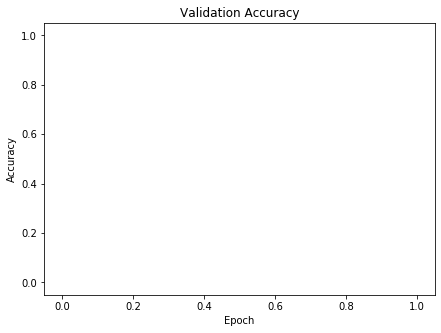

In [24]:
plot_metric(accuracy, 'Accuracy')

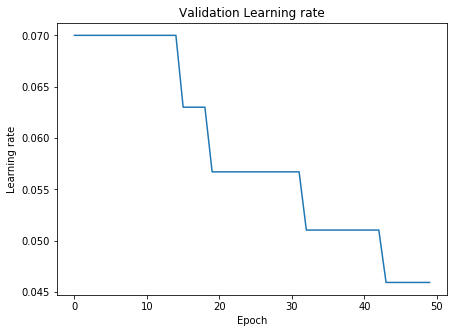

In [14]:
plot_metric(lr_data, 'Learning rate')

In [15]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

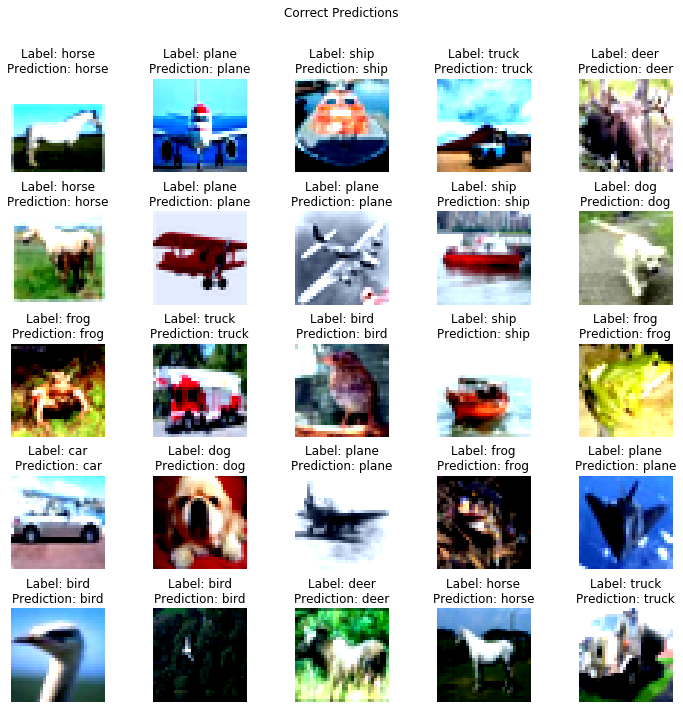

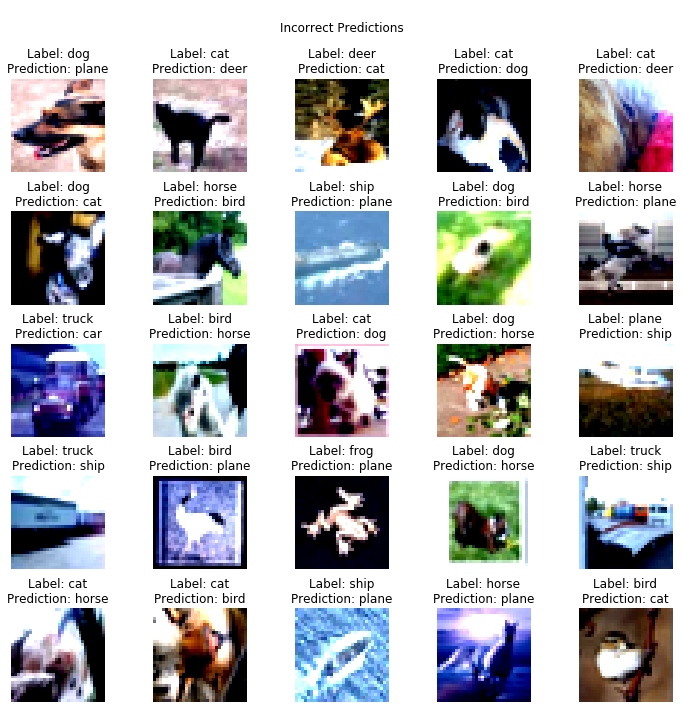

In [16]:
save_and_show_result(correct_samples, incorrect_samples, classes)

In [17]:
torch.save(net.state_dict(), 'C:/Users/gajanana_ganjigatti/Documents/Gaju_data/Quest/eva4/S10/saved/cifat10.pth')

In [18]:
from grad_cam import *

In [19]:
grid_image=grad_cam()

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\functional.py:2390: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


### Group of dog image

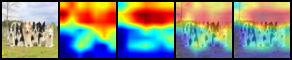

In [20]:
transforms.ToPILImage()(grid_image)

In [26]:
import datetime
print("Model End Time :" + datetime.datetime.today().ctime())

Model End Time :Mon Mar 23 15:46:59 2020
